#### Name: Md. Abid Ullah Muhib

#### Reg. No.: 2020331089

##### Session : 2020-2021

##### Computer Science & Engineering, SUST

<hr />


# Digital-Digital Conversion Techniques

This notebook simulates digital to digital conversion schemes, including Line Coding and Decoding, as well as Block
Coding and Decoding Schemes.

## 1. Generating a Digital Signal

Generating a random binary signal.


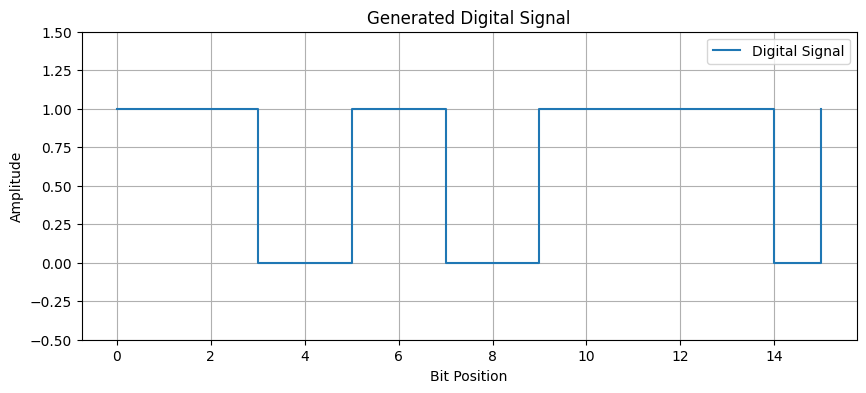

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_bits = 16  # Length of the digital signal
bit_rate = 1  # bits per second
time = np.linspace(0, num_bits, num_bits * 100)

# Generate a random binary signal
digital_signal = np.random.choice([0, 1], size=num_bits)

# Visualize the digital signal
plt.figure(figsize=(10, 4))
plt.step(range(num_bits), digital_signal, where='post', label='Digital Signal')
plt.xlabel('Bit Position')
plt.ylabel('Amplitude')
plt.title('Generated Digital Signal')
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.legend()
plt.show()

## 2. Line Coding and Decoding

#### 2.1. Line Coding (NRZ - Non-Return-to-Zero)

In NRZ line coding, a '1' is represented by a high voltage and a '0' by a low voltage.


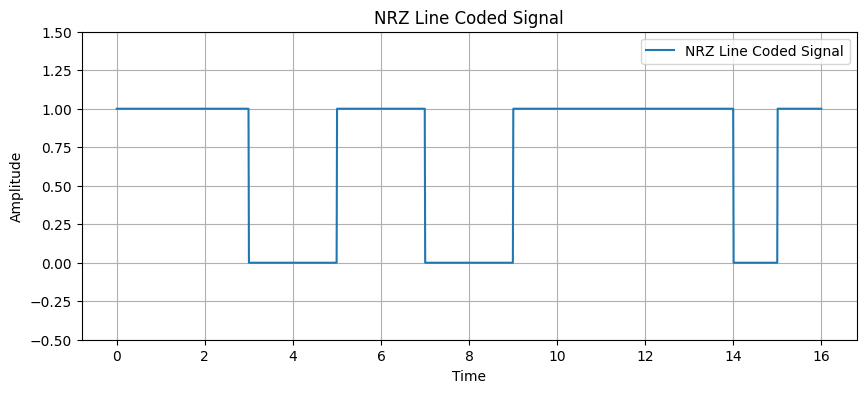

In [12]:
# NRZ Line Coding
nrz_signal = np.repeat(digital_signal, 100)

# Visualize the NRZ line coded signal
plt.figure(figsize=(10, 4))
plt.plot(time, nrz_signal, label='NRZ Line Coded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('NRZ Line Coded Signal')
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.legend()
plt.show()

#### 2.2. Line Decoding


In [13]:
# NRZ Line Decoding
decoded_nrz_signal = nrz_signal.reshape(num_bits, 100).mean(axis=1) > 0.5
decoded_nrz_signal = decoded_nrz_signal.astype(int)

# Verify the decoding process
print(f"Original Signal: {digital_signal}")
print(f"Decoded NRZ Signal: {decoded_nrz_signal}")

Original Signal: [1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1]
Decoded NRZ Signal: [1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1]


## 3. Block Coding and Decoding

#### 3.1. Block Coding (e.g., 4B/5B Encoding)

In 4B/5B encoding, every 4-bit group is encoded into a 5-bit group.


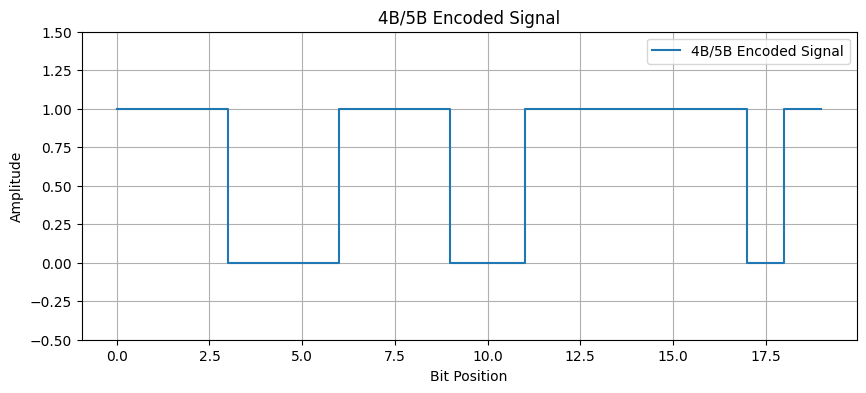

In [14]:
# 4B/5B Encoding Table
encoding_table = {
    '0000': '11110', '0001': '01001', '0010': '10100', '0011': '10101',
    '0100': '01010', '0101': '01011', '0110': '01110', '0111': '01111',
    '1000': '10010', '1001': '10011', '1010': '10110', '1011': '10111',
    '1100': '11010', '1101': '11011', '1110': '11100', '1111': '11101'
}

# Split the digital signal into 4-bit groups
binary_str = ''.join(map(str, digital_signal))
groups = [binary_str[i:i+4] for i in range(0, len(binary_str), 4)]

# Encode each 4-bit group into 5-bit group
encoded_signal = ''.join([encoding_table[group] for group in groups])

# Visualize the encoded signal
encoded_signal_array = np.array(list(map(int, encoded_signal)))
time_encoded = np.linspace(0, len(encoded_signal_array), len(encoded_signal_array) * 100)

plt.figure(figsize=(10, 4))
plt.step(range(len(encoded_signal_array)), encoded_signal_array, where='post', label='4B/5B Encoded Signal')
plt.xlabel('Bit Position')
plt.ylabel('Amplitude')
plt.title('4B/5B Encoded Signal')
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.legend()
plt.show()

#### 3.2. Block Decoding


In [15]:
# 5B/4B Decoding Table
decoding_table = {v: k for k, v in encoding_table.items()}

# Split the encoded signal into 5-bit groups
encoded_groups = [encoded_signal[i:i+5] for i in range(0, len(encoded_signal), 5)]

# Decode each 5-bit group into 4-bit group
decoded_signal = ''.join([decoding_table[group] for group in encoded_groups])

# Convert decoded signal back to array format
decoded_signal_array = np.array(list(map(int, decoded_signal)))

# Verify the decoding process
print(f"Original Signal: {digital_signal}")
print(f"Decoded 4B/5B Signal: {decoded_signal_array}")

Original Signal: [1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1]
Decoded 4B/5B Signal: [1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1]
